In [1]:
# Reference: https://youtu.be/WrAkpobchUk

In [2]:
import pandas as pd
%matplotlib inline
data = pd.read_csv('data/coffees.csv')

In [3]:
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [4]:
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [5]:
data.coffees[:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

In [6]:
print(len(data))

671


In [7]:
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2011-12-09 10:32:00,13523.0,Quentin
freq,1,2,367


In [8]:
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


In [9]:
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

In [10]:
data.coffees = pd.to_numeric(data.coffees, errors='coerce')

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [11]:
data.dtypes

timestamp       object
coffees        float64
contributor     object
dtype: object

In [12]:
data.dropna(inplace=True)
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


In [15]:
data.coffees = data.coffees.astype(int)
data.timestamp = pd.to_datetime(data.timestamp)
print(data.dtypes)
data.head()

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object


,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


In [16]:
data.timestamp[0]

Timestamp('2011-10-03 08:22:00')

In [ ]:
data.describe(include='all')

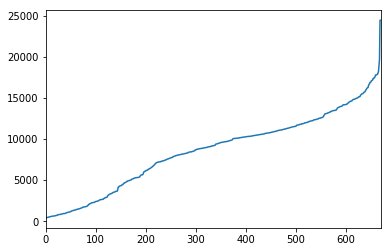

In [18]:
data.coffees.plot()

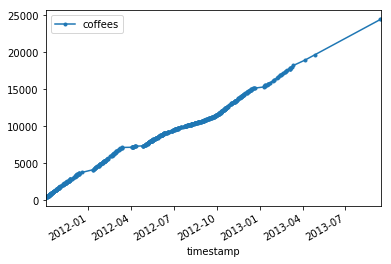

In [19]:
data.plot(x=data.timestamp, style='.-')

In [20]:
data.tail(10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


In [21]:
data = data[data.timestamp < '2013-03-01']

In [22]:
data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


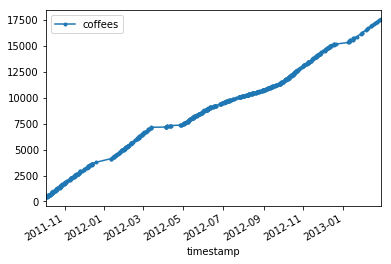

In [23]:
data.plot(x=data.timestamp, style='.-')

In [24]:
vc = data.contributor.value_counts()
print('Type:', type(vc))
print('Indices:', vc.index)
print('Values:', vc.values)
print()
print(vc)

Type: <class 'pandas.core.series.Series'>
Indices: Index(['Quentin', 'Mike', 'Sergio', 'Mike M', 'Colm', 'Anthony', 'Ben',
       'Stefano', 'Arturo'],
      dtype='object')
Values: [354 152  89  29  12   4   3   2   1]

Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64


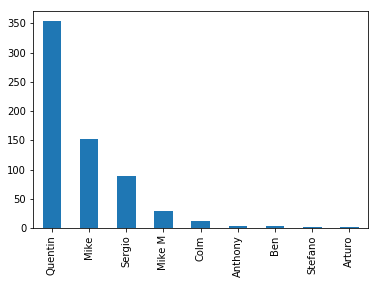

In [25]:
data.contributor.value_counts().plot(kind='bar')

In [26]:
weekdays = data.timestamp.dt.weekday_name

data = data.assign(weekdays=weekdays)
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


In [27]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count = data.groupby('weekdays').count()
weekday_count = weekday_count.loc[weekday_names]

weekday_count

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


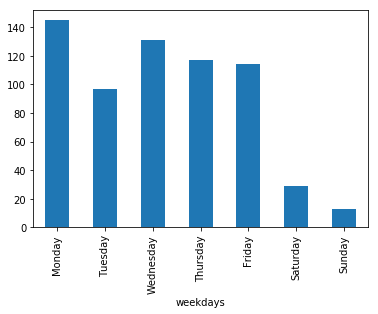

In [28]:
weekday_count.coffees.plot(kind='bar')

In [29]:
data.index = data.timestamp
data.head()

,timestamp,coffees,contributor,weekdays
timestamp,,,,
2011-10-03 08:22:00,2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,2011-10-06 07:21:00,503,Anthony,Thursday


In [30]:
data.drop(['timestamp'], axis=1, inplace=True)
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


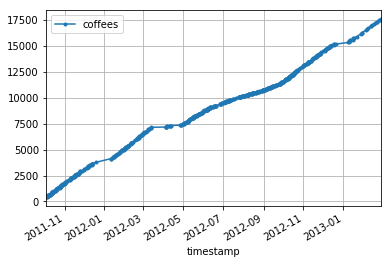

In [31]:
data.plot(style='.-', grid=True)

In [33]:
midnights = pd.date_range(data.index[0], data.index[-1], freq='D', normalize=True)
midnights

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

In [34]:
new_index = midnights.union(data.index)
new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

In [35]:
unsampled_data = data.reindex(new_index)
unsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


In [36]:
unsampled_data = unsampled_data.interpolate(methoid='time')
unsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,403.5,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,437.0,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,492.0,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


In [41]:
daily_data = unsampled_data.resample('D').asfreq()
daily_data = daily_data.drop(['contributor'], axis=1)
daily_data['weekdays'] = daily_data.index.weekday_name
daily_data

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,403.500000,Tuesday
2011-10-05,437.000000,Wednesday
2011-10-06,492.000000,Thursday
2011-10-07,572.000000,Friday
2011-10-08,640.000000,Saturday
2011-10-09,645.000000,Sunday
2011-10-10,653.000000,Monday
2011-10-11,741.500000,Tuesday
2011-10-12,780.000000,Wednesday


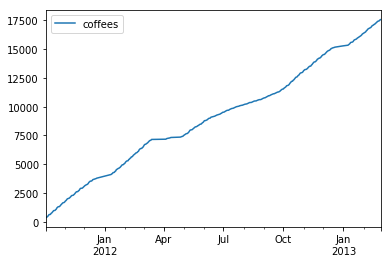

In [45]:
daily_data.plot()

In [69]:
coffees_made = daily_data.coffees.diff().shift(-1)
daily_data['coffees_made_today'] = coffees_made

daily_data.head(10)

,coffees,weekdays,coffees_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,403.5,Tuesday,33.5
2011-10-05,437.0,Wednesday,55.0
2011-10-06,492.0,Thursday,80.0
2011-10-07,572.0,Friday,68.0
2011-10-08,640.0,Saturday,5.0
2011-10-09,645.0,Sunday,8.0
2011-10-10,653.0,Monday,88.5
2011-10-11,741.5,Tuesday,38.5
2011-10-12,780.0,Wednesday,71.5


In [72]:
coffees_by_day = daily_data.groupby('weekdays').mean()
coffees_by_day = coffees_by_day.loc[weekday_names]
coffees_by_day

,coffees,coffees_made_today
weekdays,,
Monday,9105.321682,42.761075
Tuesday,9029.912720,36.846849
Wednesday,9066.759568,49.298569
Thursday,9000.000049,42.228592
Friday,9042.228641,35.879796
Saturday,9078.108437,14.462216
Sunday,9092.570653,12.751029


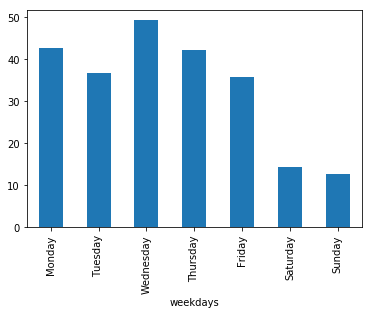

In [75]:
coffees_by_day['coffees_made_today'].plot(kind='bar')

In [77]:
people = pd.read_csv('data/department_members.csv')

people.head()

,date,members
0,2011-08-31,12
1,2011-09-30,14
2,2011-10-31,14
3,2011-11-30,14
4,2011-12-31,15
